In [27]:
import pandas as pd
import numpy as np

from data_processing_functions import *

from sktime.performance_metrics.forecasting import mean_absolute_error

# nice time series plots
from sktime.utils.plotting import plot_series

# from sktime.forecasting.var import VAR

from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
full_data = pd.read_csv("../../Data/Train/Clean/full_m3_monthly_micro_clean.csv", header=None, skiprows=1)
protected_full = pd.read_csv("../../Data/Train/Clean/protected_m3_monthly_micro_h1_AN_1.csv")
# convert to a list of series, potentially with different lengths
full_data = [x.dropna() for _, x in full_data.iterrows()]
protected_full = [x.dropna() for _, x in protected_full.iterrows()]
test = pd.read_csv("../../Outputs/Forecasts/Test_h1.csv")
orig_fcasts = pd.read_csv("../../Outputs/Forecasts/VAR_h1_original.csv")
protected_fcasts = pd.read_csv("../../Outputs/Forecasts/VAR_h1_AN_1.csv")

In [3]:
orig_maes = mean_absolute_error(test, orig_fcasts, multioutput="raw_values")

In [4]:
protected_maes = mean_absolute_error(test, protected_fcasts, multioutput="raw_values")

In [5]:
np.argsort(protected_maes)

array([172, 354, 460,  95, 349, 453, 149, 183, 461, 449, 118, 365, 108,
       355,  68, 131, 309, 170, 376,  91, 428, 351, 352,  14, 443,  83,
       470, 450, 445, 104, 190, 269, 374, 369, 462, 112, 182, 472, 127,
       463, 232,  88, 251,  27, 308, 168, 219, 340,  82, 451, 192,  16,
       102, 408, 348,  94, 122, 222, 383, 143, 371,  89, 237, 193,  77,
       317, 213, 311, 306, 220, 202, 413,  43, 409, 113, 217, 431, 459,
       326, 456, 144,  51,  36, 323, 169, 424,  93, 130, 205, 412, 368,
       129, 259, 320,  11, 147, 221, 211, 185, 367, 325, 164, 114, 244,
       416,  48, 373,  54, 191, 372, 360, 387, 321,  64,  31, 406, 322,
       106,  80, 356, 255,  92, 272, 436, 473, 204, 109, 207, 425, 414,
       282, 310,  56, 422, 198,   0, 124, 400, 119, 271, 140, 273, 210,
        97, 246, 418, 274, 366, 471,  29, 318, 407, 188, 452, 314, 335,
       243, 262, 267, 417, 420, 260, 142, 441,  34, 444, 440, 405, 437,
       160, 384, 100, 421, 253, 241, 337, 154,  70, 316, 319,  4

In [6]:
np.argsort(orig_maes - protected_maes)

array([288,  86,  58,  81, 300, 393, 240,  20,   4,   3, 287, 264, 430,
       303, 305, 177, 238,  72, 247, 181, 279,   9, 284, 298, 394, 224,
        19, 157,  39,  42, 301, 152, 330, 179, 399, 289, 236, 249, 233,
       398,  25, 396,  63, 176, 361, 395, 165, 186, 231, 363, 293, 410,
       256, 404, 228,  18, 362,  59,  35, 294, 199, 286, 203, 161,  28,
        76, 385, 285, 345, 429, 254, 162, 173,   8, 258, 265, 380, 465,
       442,  78, 464, 156,  13, 180, 381, 178, 328, 277, 302, 275,  85,
       386, 128, 415, 189, 291, 276, 377,   2, 151,  73, 250, 375,   7,
       167, 334, 281,  50, 158,  74, 332,  23, 278, 342, 214, 439, 344,
       135, 206, 101, 299, 196, 107, 290, 353, 359, 343, 257, 357, 184,
       297, 379, 324,  15, 336, 187, 216, 315, 134, 197, 333, 121,  47,
       229, 446, 141, 295, 292, 435,  75, 427,  21, 163, 252,  60, 331,
       327, 304,  44,  32, 175,   6, 218, 137, 312, 136, 267, 420, 423,
       397, 407, 296, 329, 433, 195, 378, 338, 123,  30, 105, 14

In [7]:
np.sort(orig_maes - protected_maes)

array([-6.41817849e+07, -2.10224420e+04, -1.68039378e+04, -1.28651433e+04,
       -8.20908137e+03, -7.38822548e+03, -5.62505151e+03, -5.38736080e+03,
       -5.32866623e+03, -4.92908467e+03, -4.92696692e+03, -3.86473892e+03,
       -3.85269302e+03, -3.65345552e+03, -3.15328608e+03, -3.12458169e+03,
       -3.12233100e+03, -3.07543777e+03, -2.93813734e+03, -2.83263104e+03,
       -2.82214411e+03, -2.82042918e+03, -2.79796320e+03, -2.53489479e+03,
       -2.39819713e+03, -2.37476364e+03, -2.33540460e+03, -2.33198527e+03,
       -2.31143291e+03, -2.29650238e+03, -2.28053780e+03, -2.27170115e+03,
       -2.17631812e+03, -2.10715140e+03, -2.10029835e+03, -2.08654647e+03,
       -2.07646931e+03, -2.02458342e+03, -2.01321508e+03, -1.98166699e+03,
       -1.92580044e+03, -1.89736072e+03, -1.88064752e+03, -1.80888984e+03,
       -1.79245275e+03, -1.74372888e+03, -1.72334733e+03, -1.70472047e+03,
       -1.69855796e+03, -1.58383546e+03, -1.52253963e+03, -1.52043428e+03,
       -1.51421673e+03, -

In [8]:
np.max(orig_maes)-np.min(orig_maes)

7632.277784959303

In [9]:
np.max(protected_maes) - np.min(protected_maes)

64182156.67436259

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='288'>)

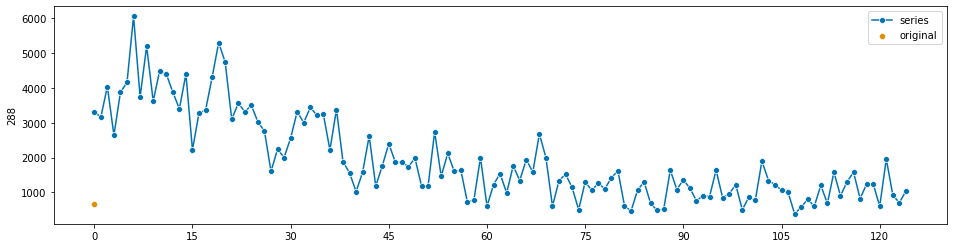

In [10]:
plot_series(full_data[288], orig_fcasts.iloc[:,288], labels = ["series", "original"])

C:\Users\Cameron\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='283'>)

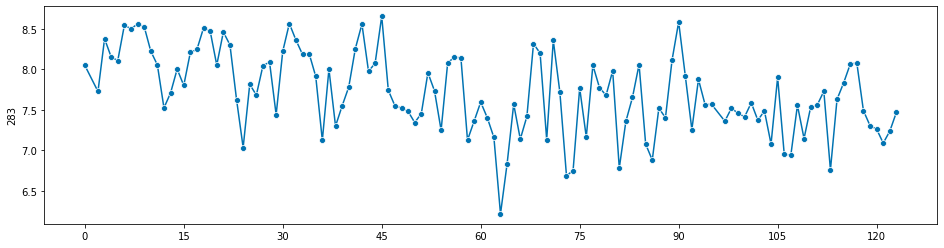

In [11]:
ps = protected_full[283]
ps.index = np.arange(0, len(ps))
plot_series(np.log(ps))

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='284'>)

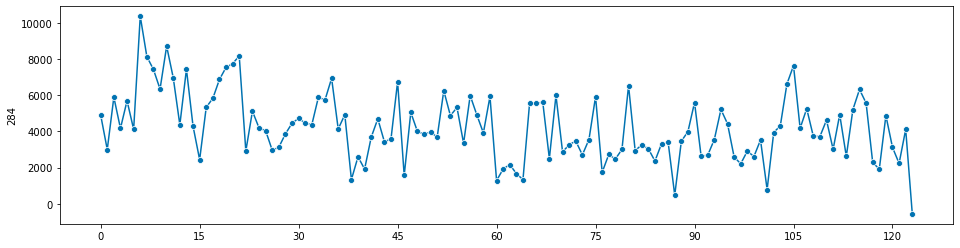

In [12]:
ps = protected_full[284]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='285'>)

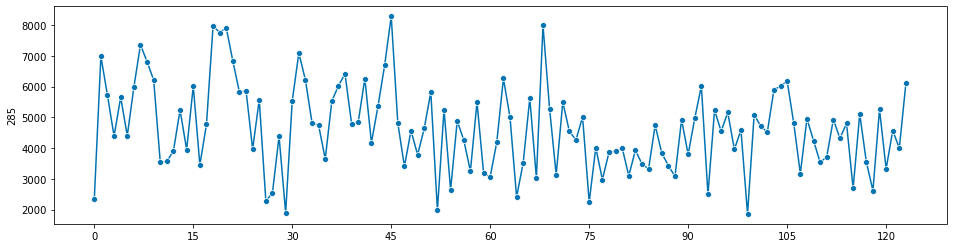

In [13]:
ps = protected_full[285]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='286'>)

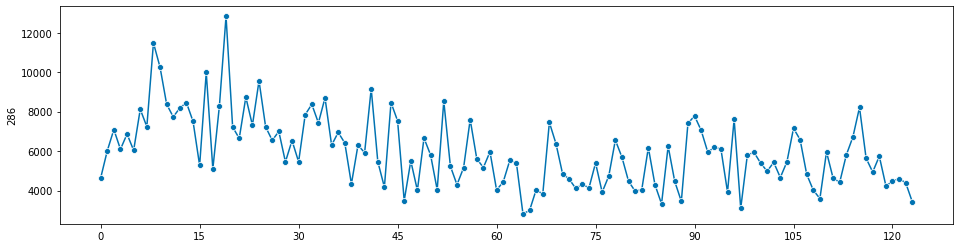

In [14]:
ps = protected_full[286]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='287'>)

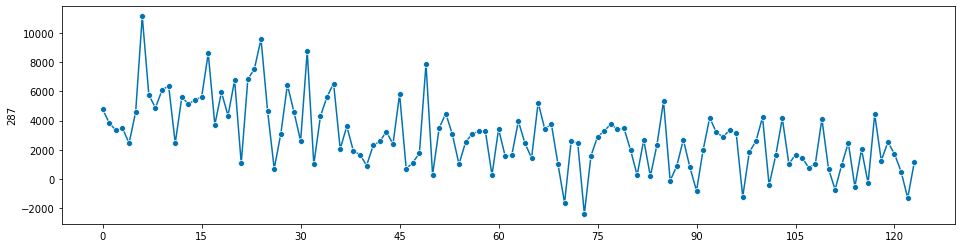

In [15]:
ps = protected_full[287]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='288'>)

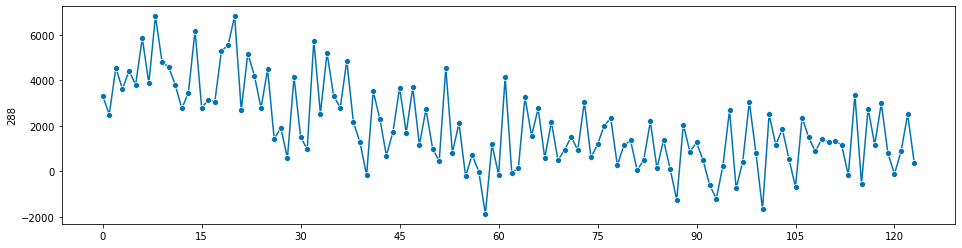

In [16]:
ps = protected_full[288]
ps.index = np.arange(0, len(ps))
plot_series(ps)

In [17]:
temp, _, _, _, full_lags = pre_process(protected_full[283:289], target_forecast_period=1, log=True, make_stationary=True, sp=12)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

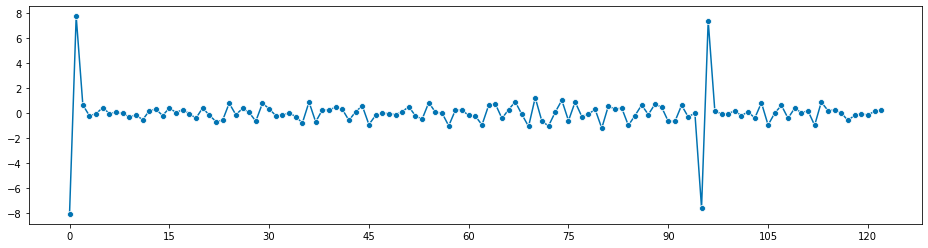

In [18]:
ps = temp[0]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

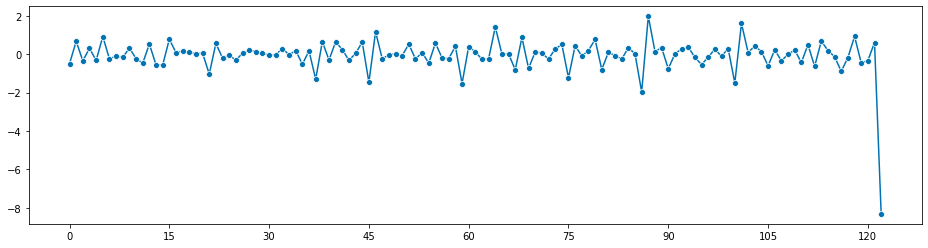

In [19]:
ps = temp[1]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

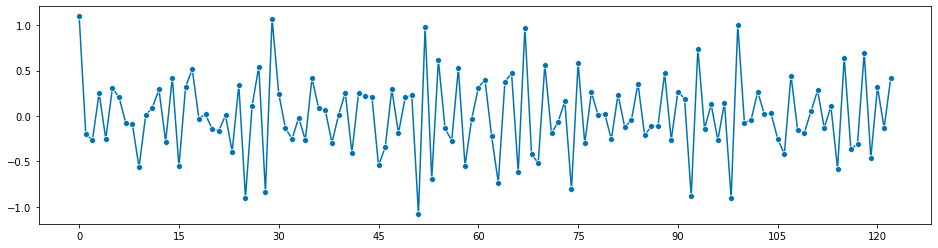

In [20]:
ps = temp[2]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

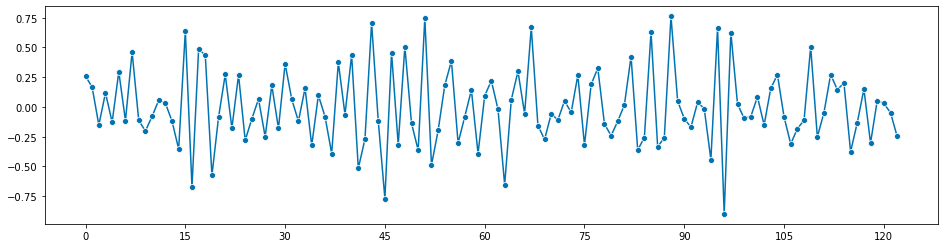

In [21]:
ps = temp[3]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

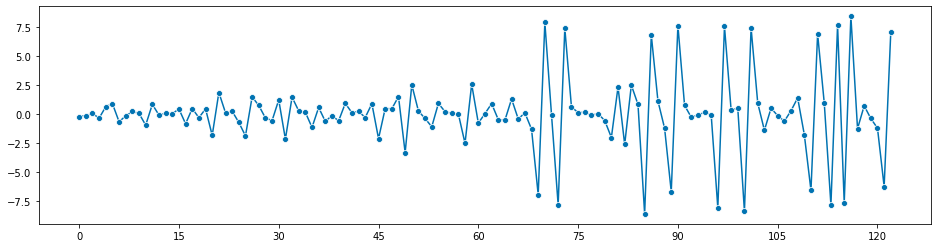

In [22]:
ps = temp[4]
ps.index = np.arange(0, len(ps))
plot_series(ps)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

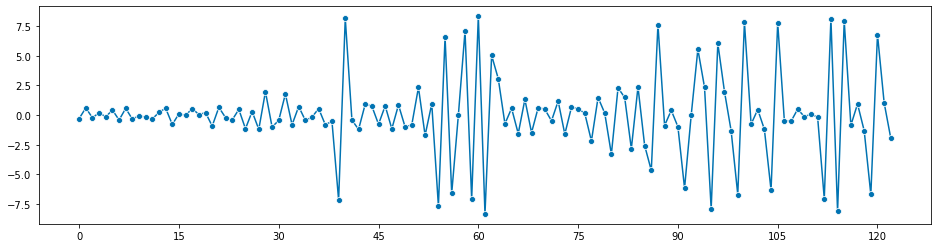

In [23]:
ps = temp[5]
ps.index = np.arange(0, len(ps))
plot_series(ps)

In [24]:
# convert list to TxK dataframe
group = pd.concat(temp, axis=1, ignore_index=True)

In [25]:
group

,0,1,2,3,4,5
0,-8.050717,-0.492680,1.098091,0.260123,-0.218488,-0.289442
1,7.727143,0.674917,-0.200249,0.164993,-0.136849,0.604788
2,0.652138,-0.345911,-0.264607,-0.151297,0.043803,-0.232265
3,-0.226004,0.311786,0.254194,0.118858,-0.352529,0.201822
4,-0.043878,-0.324548,-0.250767,-0.128281,0.624272,-0.149770
...,...,...,...,...,...,...
118,-0.185798,0.932522,0.697924,-0.303224,0.699102,-1.313529
119,-0.042757,-0.446721,-0.459366,0.053533,-0.385586,-6.688420
120,-0.173213,-0.332839,0.319185,0.030117,-1.218839,6.787925
121,0.147827,0.609483,-0.133030,-0.048125,-6.232595,1.040359


In [28]:
forecaster = VAR(endog=group)
results = forecaster.fit(ic='bic', trend='c')

In [29]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 30, Jun, 2022
Time:                     13:37:15
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   0.496157
Nobs:                     122.000    HQIC:                -0.0770793
Log likelihood:          -968.044    FPE:                   0.626000
AIC:                    -0.469162    Det(Omega_mle):        0.447914
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.053730         0.099182            0.542           0.588
L1.0         -0.418612         0.071066           -5.890           0.000
L1.1         -0.068881         0.182168           -0.378           0.705
L1.2          0.216054 

In [36]:
results.coefs

array([[[-0.41861186, -0.06888095,  0.21605357,  0.67055438,
         -0.05623913, -0.01669415],
        [ 0.00532701, -0.67910034,  0.08028441,  0.02699826,
          0.08130189,  0.04506534],
        [-0.00618054,  0.06227539, -0.51292663,  0.02964783,
         -0.01547734, -0.01599157],
        [ 0.01991979,  0.00595885,  0.13603035, -0.41893554,
          0.00133132, -0.00415412],
        [ 0.36770518, -0.64030724, -0.16767536, -0.80547784,
         -0.45938917,  0.15133945],
        [ 0.21765645, -1.27190207,  0.63522886,  0.14436147,
          0.03331863, -0.52151807]]])

In [30]:
intercepts = results.coefs_exog

In [31]:
# number of lags in VAR model
lag_order = results.k_ar

In [32]:
lag_order

1

In [33]:
# forecast nfs steps ahead using lag_order prior values
predictions = results.forecast(np.array(group[-lag_order:]), steps=1)

In [35]:
predictions.T

array([[ 0.09150399],
       [ 6.10323228],
       [-0.82190409],
       [ 0.1286257 ],
       [ 1.971672  ],
       [12.10673838]])